<a href="https://colab.research.google.com/github/Noahkandie/Tweet-Classifier-Group-IP/blob/main/week10_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members
* Vanessa Ng'eno
* Panchol Alier
* Noah Kandie
* Mildred Kulei

# Research Question


This analysis aims to develop a prediction model to determine whether or not a  tweet is disaster tweet or it is not base on the keyword and the messege tweeted

# Metric of Success



The model will be consider successiful if it predict with at least 80% accuracy 

The overall project will be considered a success when we are able to develop a reliable prediction model that has a high accuracy level. We shall make sure the model doesn't suffer from any instances of overfitting or underfitting

# Context 

This dataset contains 7613 tweets extracted using the twitter api . The tweets have been annotated (0 = not a  disaster, 1 = disaster) and they can be used to detect if a tweet is about a  disaster or not. 

# Content 

It contains the following 6 fields:
* target: the polarity of the tweet (0 = negative, 1 = positive)

* ids: The id of the tweet ( 2087)

* location: the location of where the tweeted

* keyword: a keyword extracted from the text column

* text: the text of the tweet (Lyx is cool)


# Experimental Design and Implementation 

The following steps that will be used in this analysis in order to help in acheiving the intended goal


Load data and preview preliminary characteristics

Data Cleaning

EDA

Implementing the Solution

Findings and recomendation

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import pandas as pd
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
 
import matplotlib.pyplot as plt
 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
 
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC

In [189]:
# Reading the data from the csv file

data_train = pd.read_csv('train.csv')
data_test  = pd.read_csv('test.csv')
data_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [190]:
data_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Reading the data

In [191]:
# Reading the data from the csv file

data_test = pd.read_csv('train.csv')
data_test

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Checking the data

In [192]:
# Checking the top 5 records

data_train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [193]:
data_train.tail(5)

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [194]:
data_train.loc[1]

id                                               4
keyword                                        NaN
location                                       NaN
text        Forest fire near La Ronge Sask. Canada
target                                           1
Name: 1, dtype: object

1 - real disaster

0 - no disaster

In [195]:
# Confirming number of records and columns

data_train.shape

(7613, 5)

In [196]:
# Checking the attributes data type

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [197]:
# Checking number of unique variables for each column

data_train.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

# Data Cleaning

In [198]:
# Checking for duplicates

data_train.duplicated().any()

False

In [199]:
# Check for missing data

data_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [200]:
data_train = data_train.drop(columns=['id'])

In [201]:
# Drop remaining null values

data_train = data_train.dropna()

In [202]:
data_train

,keyword,location,text,target
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
7575,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0
7577,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0
7579,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0
7580,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0


In [203]:
data_train['chars_num'] = data_train['text'].apply(lambda t: len(t))
data_train

,keyword,location,text,target,chars_num
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...,...
7575,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,51
7577,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,107
7579,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,107
7580,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93


In [204]:
#reoving the URL links
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [205]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)


'New competition launched :'

In [206]:
data_train['text']=data_train['text'].apply(lambda x : remove_URL(x))

In [207]:
data_train

,keyword,location,text,target,chars_num
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze,1,55
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT,0,67
33,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...,...
7575,wrecked,TN,On the bright side I wrecked,0,51
7577,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,107
7579,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,107
7580,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93


In [208]:
# Checking the shape of the new dataset

data_train.shape

(5080, 5)

In [209]:
#removing all the panctuation marks in 'text' column
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [210]:
data_train['text']=data_train['text'].apply(lambda x : remove_punct(x))

In [211]:
#confirming that the punctuation marks have been removed.
data_train

,keyword,location,text,target,chars_num
31,ablaze,Birmingham,bbcmtd Wholesale Markets ablaze,1,55
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy metal RT,0,67
33,ablaze,AFRICA,AFRICANBAZE Breaking newsNigeria flag set abla...,1,82
34,ablaze,"Philadelphia, PA",Crying out for more Set me ablaze,0,34
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...,...
7575,wrecked,TN,On the bright side I wrecked,0,51
7577,wrecked,#NewcastleuponTyne #UK,widda16 Hes gone You can relax I thought the ...,0,107
7579,wrecked,"Vancouver, Canada",Three days off from work and theyve pretty muc...,0,107
7580,wrecked,London,FX forex trading Cramer Igers 3 words that wre...,0,93


In [212]:
#removing punctuation arks in 'location' column
def remove_punct(location):
    table=str.maketrans('','',string.punctuation)
    return location.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [213]:
data_train['location']=data_train['location'].apply(lambda x : remove_punct(x))

In [214]:
data_train

,keyword,location,text,target,chars_num
31,ablaze,Birmingham,bbcmtd Wholesale Markets ablaze,1,55
32,ablaze,Est September 2012 Bristol,We always try to bring the heavy metal RT,0,67
33,ablaze,AFRICA,AFRICANBAZE Breaking newsNigeria flag set abla...,1,82
34,ablaze,Philadelphia PA,Crying out for more Set me ablaze,0,34
35,ablaze,London UK,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...,...
7575,wrecked,TN,On the bright side I wrecked,0,51
7577,wrecked,NewcastleuponTyne UK,widda16 Hes gone You can relax I thought the ...,0,107
7579,wrecked,Vancouver Canada,Three days off from work and theyve pretty muc...,0,107
7580,wrecked,London,FX forex trading Cramer Igers 3 words that wre...,0,93


In [215]:
#putting the texts characters to lower case
data_train['text'] = data_train['text'].map(lambda x: x.lower())

In [216]:
#lowering the characters in location column
data_train['location'] = data_train['location'].map(lambda x: x.lower())

In [217]:
data_train

,keyword,location,text,target,chars_num
31,ablaze,birmingham,bbcmtd wholesale markets ablaze,1,55
32,ablaze,est september 2012 bristol,we always try to bring the heavy metal rt,0,67
33,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1,82
34,ablaze,philadelphia pa,crying out for more set me ablaze,0,34
35,ablaze,london uk,on plus side look at the sky last night it was...,0,76
...,...,...,...,...,...
7575,wrecked,tn,on the bright side i wrecked,0,51
7577,wrecked,newcastleupontyne uk,widda16 hes gone you can relax i thought the ...,0,107
7579,wrecked,vancouver canada,three days off from work and theyve pretty muc...,0,107
7580,wrecked,london,fx forex trading cramer igers 3 words that wre...,0,93


In [218]:
#function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [219]:
#removing the emojis in text column if any.
data_train['text']=data_train['text'].apply(lambda x: remove_emoji(x))

In [220]:
data_train

,keyword,location,text,target,chars_num
31,ablaze,birmingham,bbcmtd wholesale markets ablaze,1,55
32,ablaze,est september 2012 bristol,we always try to bring the heavy metal rt,0,67
33,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1,82
34,ablaze,philadelphia pa,crying out for more set me ablaze,0,34
35,ablaze,london uk,on plus side look at the sky last night it was...,0,76
...,...,...,...,...,...
7575,wrecked,tn,on the bright side i wrecked,0,51
7577,wrecked,newcastleupontyne uk,widda16 hes gone you can relax i thought the ...,0,107
7579,wrecked,vancouver canada,three days off from work and theyve pretty muc...,0,107
7580,wrecked,london,fx forex trading cramer igers 3 words that wre...,0,93


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


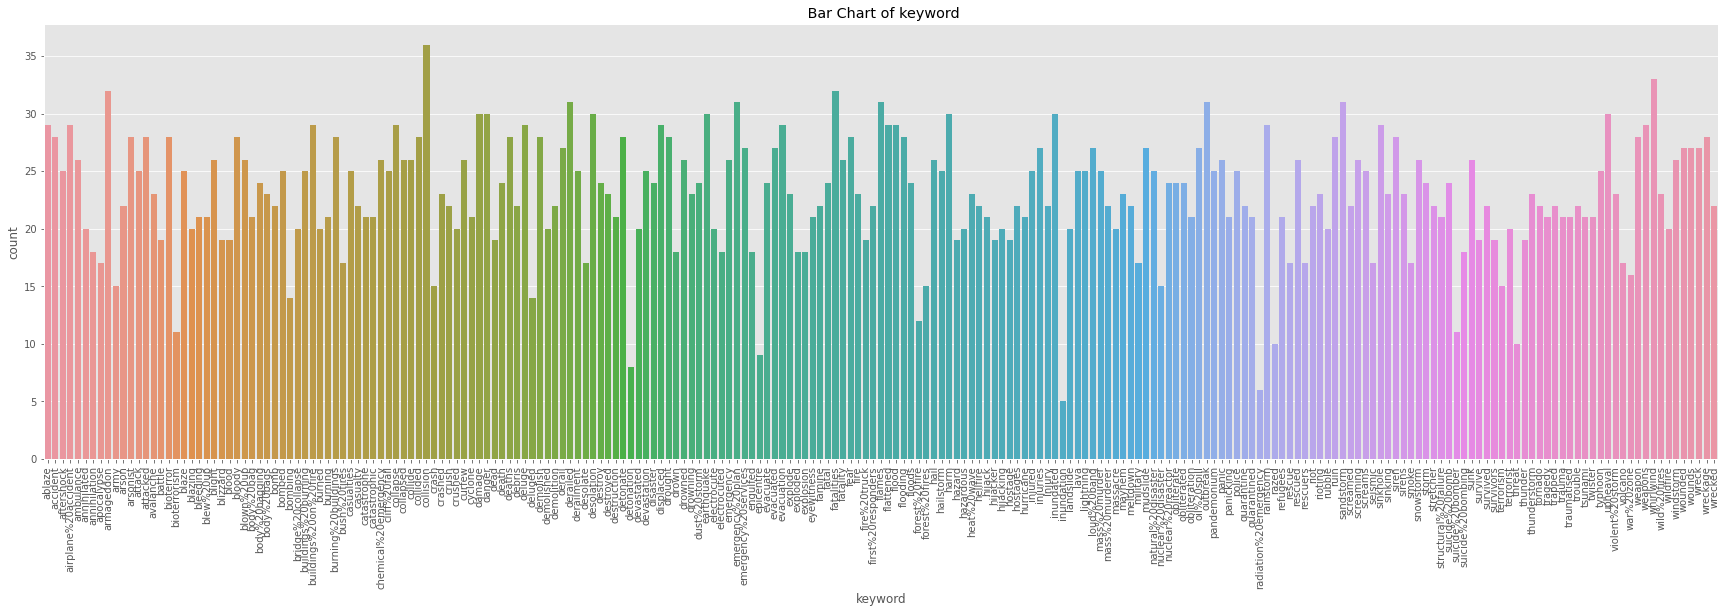

In [221]:
## Countplot for the target variable Not disaster and not disaster
plt.figure(figsize = (30,8))
sns.countplot(data_train["keyword"])
plt.title(" Bar Chart of keyword")
plt.xticks(rotation=90)
plt.show()

The most used keyword was "collision"

In [222]:
data_train['keyword'].value_counts()

collision                36
whirlwind                33
armageddon               32
fatalities               32
flames                   31
                         ..
razed                    10
epicentre                 9
detonation                8
radiation%20emergency     6
inundation                5
Name: keyword, Length: 221, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

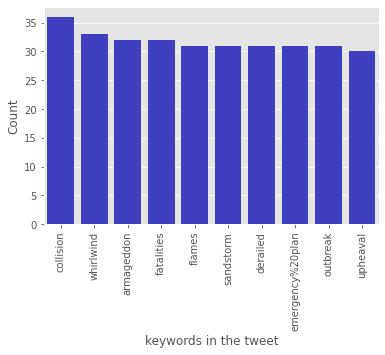

In [223]:
sns.countplot(data_train['keyword'], color='blue',saturation=0.5,order=data_train['keyword'].value_counts(sort=True).iloc[:10].index)
plt.xticks(rotation=90)
plt.xlabel('keywords in the tweet')
plt.ylabel('Count')

In [224]:
#summary statistics
data_train.describe()

,target,chars_num
count,5080.000000,5080.000000
mean,0.432283,102.319882
std,0.495442,33.405894
min,0.000000,8.000000
25%,0.000000,79.000000
50%,0.000000,109.000000
75%,1.000000,134.000000
max,1.000000,152.000000


In [225]:
#Skewness
data_train.skew()

target       0.273466
chars_num   -0.643896
dtype: float64

In [226]:
#checking for unique status in the dataset
data_train['keyword'].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

In [227]:
data_train['target'].unique

<bound method Series.unique of 31      1
32      0
33      1
34      0
35      0
       ..
7575    0
7577    0
7579    0
7580    0
7581    0
Name: target, Length: 5080, dtype: int64>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

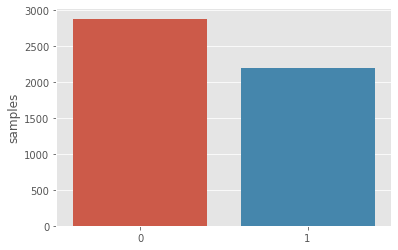

In [228]:
x=data_train.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

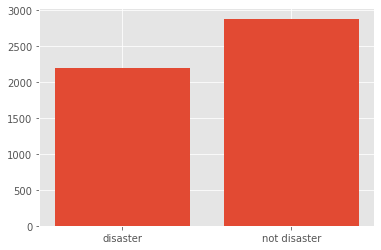

In [229]:
classes = data_train.target.unique()
counts = []

for i in classes:
  count = len(data_train[data_train.target==i])
  counts.append(count)

plt.bar(['disaster', 'not disaster'], counts)
plt.show()

In [230]:
 # Get the top 10 keywords

data_train['keyword'].value_counts(sort=True).head(10)

collision           36
whirlwind           33
armageddon          32
fatalities          32
flames              31
sandstorm           31
derailed            31
emergency%20plan    31
outbreak            31
upheaval            30
Name: keyword, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


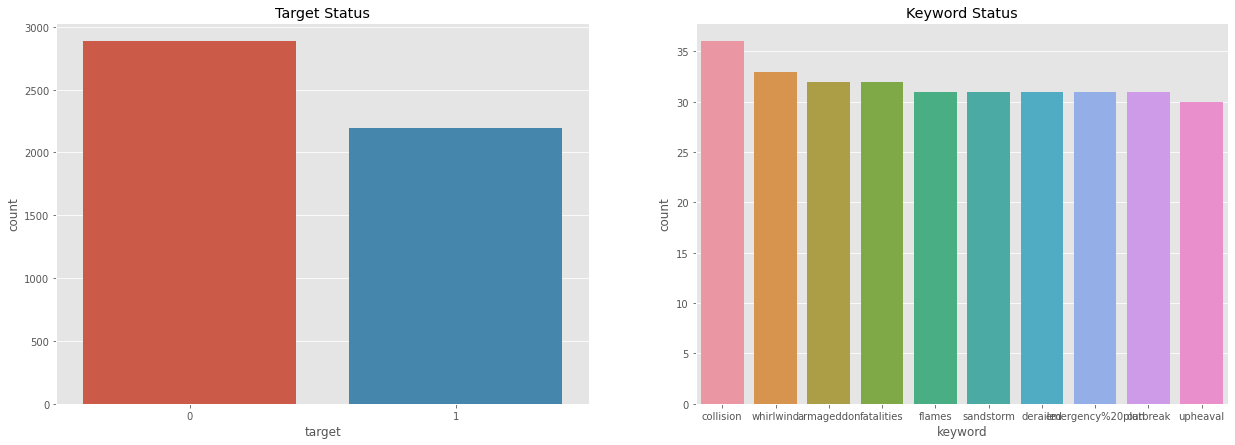

In [286]:
# plotting bar charts to check distributions

fig,ax=plt.subplots(1,2,figsize=(21,7))
sns.countplot('target',data=data_train,ax=ax[0])
ax[0].set_title('Target Status')
sns.countplot('keyword',data=data_train,ax=ax[1],orient='ho',order=data_train['keyword'].value_counts(sort=True).iloc[:10].index)
ax[1].set_title('Keyword Status')
plt.show()

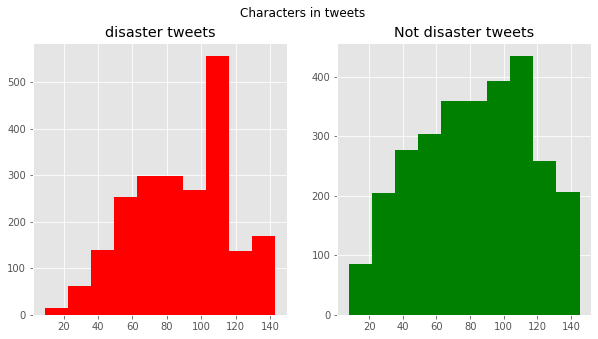

In [232]:
#ploting bar charts of the tweet's characters
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data_train[data_train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=data_train[data_train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

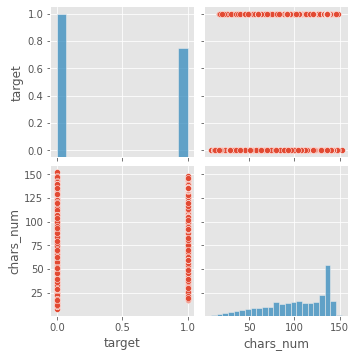

In [233]:
# Ploting the summaries and recording observations

sns.pairplot(data_train)
plt.show()
#There is no relationship between target and chars_num

## Tensor flow NN Modeling

To start modelling we still need to do a couple of things:

1.   Split data into train and test datasets
2.   Tokenize it
3.   Pad the text
4.   Encode the labels

In [234]:
# We will also download and import nlkt which is a tokenizer. 
# This library will help us break (messages) into individual linguistic units i.e. words.
#
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [235]:
# Pre-processing 
# Tokenizing the messages into into single words using nltk. 

# Applying the tokenization
# 
data_train['text']= data_train['text'].apply(nltk.word_tokenize)

In [236]:
data_train[:3]

,keyword,location,text,target,chars_num
31,ablaze,birmingham,"[bbcmtd, wholesale, markets, ablaze]",1,55
32,ablaze,est september 2012 bristol,"[we, always, try, to, bring, the, heavy, metal...",0,67
33,ablaze,africa,"[africanbaze, breaking, newsnigeria, flag, set...",1,82


In [237]:
# We will perform some word stemming. 
# The idea of stemming is to normalize our text for all variations of words carry the same meaning, 
# regardless of the tense. One of the most popular stemming algorithms is the Porter Stemmer:
# 
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
data_train['text']= data_train['text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [238]:
# Finally, we will transform the data into occurrences, 
# which will be the features that we will feed into our model
# 
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
data_train['text'] = data_train['text'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(data_train['text'])

In [239]:
# We could leave it as the simple word-count per message, but it is better to use Term Frequency Inverse Document Frequency, more known as tf-idf
# 
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [240]:
counts

<5080x11499 sparse matrix of type '<class 'numpy.float64'>'
	with 65919 stored elements in Compressed Sparse Row format>

In [241]:
# Training the Model
# Now that we have performed feature extraction from our data, it is time to build our model. 
# We will start by splitting our data into training and test sets
# 
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(data_train['text'], data_train['target'], test_size=0.1, random_state=69)
x_tr,x_val,y_tr,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=69,shuffle=True)

In [242]:
sample_size = int(len(data_train)*1)
sampleDf = data_train.sample(sample_size, random_state=23)
x = sampleDf.text.values
y = sampleDf.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [243]:
data_train.shape

(5080, 5)

In [244]:
x_train.shape,x_test.shape

((4064,), (1016,))

In [245]:
#turning a meaningful piece of tweet character, into a random string of characters called a token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [246]:
print(x_train[0])
print(X_train[0])

xeni my bet is mother natur might have plan to send a delug our way
[3847, 14, 2092, 9, 1726, 247, 819, 22, 100, 4, 406, 2, 248, 118, 138]


In [247]:
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)

print('Max len:', maxlen)

Max len: 30


In [248]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [249]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y_test = encoder.transform(y_test)
encoded_Y_train = encoder.transform(y_train)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)

## Modelling
The model that we use here is a simple Neural Network.

In [250]:
embedding_dim = 100  
# initiates the model
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,  
                          output_dim=embedding_dim, 
                          input_length=maxlen))  
model.add(layers.Dropout(0.2)) 
model.add(layers.GlobalMaxPool1D())  
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu'))  # additional hidden layer
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax')) 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 100)           1013000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)               

In [251]:
# Training the dataset
history = model.fit(X_train, dummy_y_train,
                    epochs=3,  # times model will run through the data
                    verbose=True,
                    validation_data=(X_test, dummy_y_test),
                    batch_size=128)  # data is set to batches we are sent to the model to predict, imagine each batc as a step in which model tries to predict the class and then checks the right answer and corrects it's weights with backpropogation
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/3
32/32 [==============================] - 2s 34ms/step - loss: 0.6880 - accuracy: 0.5468 - val_loss: 0.6731 - val_accuracy: 0.5659
Epoch 2/3
32/32 [==============================] - 1s 21ms/step - loss: 0.6607 - accuracy: 0.5786 - val_loss: 0.6099 - val_accuracy: 0.7333
Epoch 3/3
32/32 [==============================] - 1s 21ms/step - loss: 0.5507 - accuracy: 0.7641 - val_loss: 0.4839 - val_accuracy: 0.7874
Training Accuracy: 0.8799
Testing Accuracy:  0.7874


In [252]:
import tensorflow as tf
import datetime

In [253]:
rm -rf ./logs/

Plot the  model training logs

In [254]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

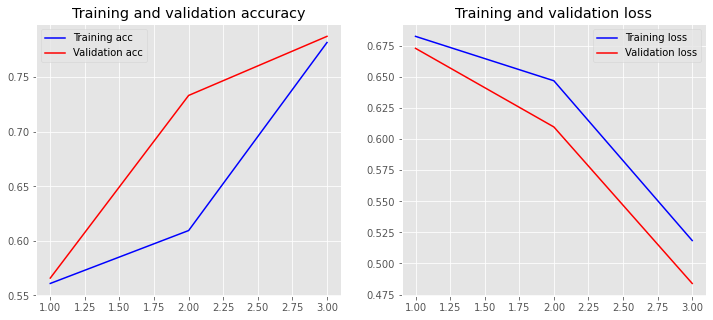

In [255]:
plot_history(history)

Essentially the point where training crosses validation you would want to stop training as it means that model is starting to remember exact things instead of learning patterns and therefore cause overfitting, which here is at 3rd epoch.

In [256]:
# # Visualize the logs using tensorboard.
# %load_ext tensorboard
# %tensorboard --logdir lightning_logs/
# #%tensorboard --logdir logs/fit

In [257]:
#these are the encoded classes.
encoder.classes_

array([0, 1])

Confussion matrix

In [258]:
#And our predictions are stored as arrays with probabilities for each class.
y_pred = model.predict(X_test)
y_pred

array([[0.78767794, 0.21232201],
       [0.21965498, 0.78034496],
       [0.15348998, 0.84651005],
       ...,
       [0.6880427 , 0.3119573 ],
       [0.21707548, 0.78292453],
       [0.17602392, 0.8239761 ]], dtype=float32)

In [259]:
y_predDecoded = [encoder.classes_[np.argmax(i)] for i in y_pred]  # here we get the max probability from those arrays and then based on that select which class is it.
cm = confusion_matrix(y_test, y_predDecoded, labels=data_train.target.unique())  # same confusion matrix code as in Logistic Regression
df_cm = pd.DataFrame(cm, index=data_train.target.unique(), columns=data_train.target.unique())
df_cm

,1,0
1,315,126
0,90,485


We can classify correctly 816 tweets while 200 tweets were not classified correctly with a 87% accuracy.

# Implementating the other models for comparison



In [260]:
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Naive Bayes  models


Bernoulli Naive Bayes 

In [261]:
 # Creating our Bernoulli Naive Bayes object with prior probabilities of each class
model = BernoulliNB()

# Train model
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [262]:
# model score
model.score(X_train, y_train)

0.5260826771653543

In [263]:
# Predict
ypredb = model.predict(X_test)

In [264]:
# Accuracy Summary
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypredb))
print(classification_report(y_test, ypredb))

[[244 331]
 [151 290]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.50       575
           1       0.47      0.66      0.55       441

    accuracy                           0.53      1016
   macro avg       0.54      0.54      0.52      1016
weighted avg       0.55      0.53      0.52      1016



recored an accuracy of 53% for Bernoulli

# Random Forest classifier 

In [265]:

# Create a random forest classifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)

# Fitting the model
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained

y_pred = forest.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
857       1          1
534       1          1
325       1          1
473       0          1
750       0          0
            Actual    Predicted
count  1016.000000  1016.000000
mean      0.434055     0.247047
std       0.495876     0.431507
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     0.000000
max       1.000000     1.000000


In [266]:
# Assessing model accuracy

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Mean Squared Error: 0.33661417322834647
Root Mean Squared Error: 0.5801846027156757
Accuracy: 0.6633858267716536
[[499  76]
 [266 175]]


# Naive Bayes model GNG

In [267]:
# Importing
from sklearn.naive_bayes import GaussianNB

In [268]:
# Trainin our model
model = GaussianNB()  
model.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [269]:
# prediction
predicted = model.predict(X_test)

In [270]:
# Accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[ 22 553]
 [ 13 428]]
              precision    recall  f1-score   support

           0       0.63      0.04      0.07       575
           1       0.44      0.97      0.60       441

    accuracy                           0.44      1016
   macro avg       0.53      0.50      0.34      1016
weighted avg       0.55      0.44      0.30      1016



Gaussian recored an accuracy of 44%

# KNN Model

In [271]:
# Training the model

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [272]:
# Making predictions

y_pred1 = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
454       0          1
7         0          1
962       1          0
756       1          0
471       1          0
            Actual    Predicted
count  1016.000000  1016.000000
mean      0.434055     0.432087
std       0.495876     0.495610
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000


In [273]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[351 224]
 [226 215]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       575
           1       0.49      0.49      0.49       441

    accuracy                           0.56      1016
   macro avg       0.55      0.55      0.55      1016
weighted avg       0.56      0.56      0.56      1016



The classifer didn't do the good job.

# Optimazing the model by using LDA

In [274]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [275]:
# Training and Making Predictions

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Comparing a sample of the prediction

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.sample(n=5))
print(comparison_frame.describe())

     Actual  Predicted
998       1          1
313       1          1
455       1          0
981       1          0
236       0          0
            Actual    Predicted
count  1016.000000  1016.000000
mean      0.434055     0.414370
std       0.495876     0.492856
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000


In [276]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[356 219]
 [239 202]]
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       575
           1       0.48      0.46      0.47       441

    accuracy                           0.55      1016
   macro avg       0.54      0.54      0.54      1016
weighted avg       0.55      0.55      0.55      1016

Accuracy: 0.5492125984251969


# The LDA optimazation did not improve the model accuracy 

# We shall try cosine similarity

In [277]:
# Defining cosine similarity function

def cos_knn(k, X_test, y_test, X_train, y_train):
    
    # find similarity for every point in test data between every other point in the train data
    cosim = cosine_similarity(X_test, X_train)

    # get indices of records in the train data that are most similar to any given test data point
    top = [(heapq.nlargest((k+1), range(len(i)), i.take)) for i in cosim]

    # convert indices to numbers
    top = [[y_train[j] for j in i[:k]] for i in top]

     # vote, and return prediction for every record in test data
    pred = [max(set(i), key=i.count) for i in top]
    pred = np.array(pred)
    
    # print table giving classifier accuracy using target variable in the test data
    print(classification_report(y_test, pred))   
    

In [278]:
# Checking model accuracy for a 80-20 dataset split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Feature Scaling 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Checking the model accuracy
cos_knn(5, X_test, y_test, X_train, y_train)

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       475
           1       0.00      0.00      0.00       338

    accuracy                           0.58       813
   macro avg       0.29      0.50      0.37       813
weighted avg       0.34      0.58      0.43       813



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [279]:
# test_predict=model.predict(data_test['text'])
# #To merge these predictions back with the test df,
# data_test['predicted'] =test_predict
# data_test

The cosine similairity performed better the LDA but the general accuracy for the model is low, more optimaztion models needs to be explored 

# Finding
The Neural network model with a  training-test split of 80-20 provides a relatively high accuracy classification. compareed to the the rest of the model applied in analysising this text. LDA and cosine similarity distance metric do not improve the model's accuracy. 

# Recomendation
For further optimization, other distance metrics such as Euclidean and Minkowski distance metrics can be explored. In addition, different values of K can be used to check for optimal model performance.
More analysis of data with focus on key words should be point of focus in the future because some keywords were used but they didn't mean disaster at all 